# Discussion 3: EDA + Regex

This notebook will simulate the EDA process with a dataset you've seen a million times (`babynames`), giving you an opportunity to practice scouring data for interesting patterns using techniques you're already familiar with (Pandas, regular expressions).

Given the `babynames` dataset, you will be first be asked to consider and discuss a variety of factors to obtain some baseline understanding of the dataset (types of column variables, how many observations, granularity or level of each observation, etc.)

Once you've obtained a baseline understanding, try the bonus exercises in this notebook the familiarize yourself with doing EDA in a notebook environment.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# loading up the California baby names data

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

Definitions:
- Primary key: The column or minimal set of columns that uniquely determines the values in
all the remaining columns. This is a statement about the schema and should hold for all data
that could be put in the table.
Below are some constraints on the primary key:
    - The data within these columns must be unique.
    - No value in the columns can be NULL.
- Foreign key: A set of one or more columns in a table that refers to the primary key in another
table.
Foreign keys have the following properties:
    - We can have NULL values in foreign keys.
    - We can have non-unique foreign keys in a table.
    - If the foreign key is not NULL, it should reference a particular primary key in another table.


#### Warmup
What might be good examples of common primary keys and how might they be
referenced as foreign keys.

*list some potential primary keys here*

<br><br>

---

# Question 1: Data Cleaning and EDA

The following questions are somewhat open-ended and intended to be discussed as a group. Feel free to add cells to type in answers/take notes or write some code to help you think/answer the questions.

In [3]:
babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Question 1a

Consider the name, year, and count variables. What type of variable are each one? (Quantitative discrete, Quantitative continuous, Qualitative nominal, Qualitative ordinal

In [4]:
babynames.columns

Index(['State', 'Sex', 'Year', 'Name', 'Count'], dtype='object')

**Solution:** 

Year is a qualitative ordinal variable. It is not a quantitative variable de-
spite being a numerical quantity.
Count is a quantitative discrete variable. Name is a qualitative nominal variable.

## Question 1b

Which of the following is a (minimal) primary key for this table (given the sample of the data
and reasonable assumptions about what might be in the rest of the data)?

* A. State and Sex
* B. Year and Name
* C. State, Year, and Name
* D. State, Sex, Year, and Name
* E. State, Sex, Year, Name, and Count

**Solution:** 

The columns (State, Sex, Year, Name) form the primary key which uniquely
determines the value of count for this data and all data that might go in this table. We
would not expect two different values of count for the same State, Sex, Year, and
Name.

## Question 1C

Mark the following statements as true or false and justify why.

1. ( T / F ) The foreign key of a table referencing the babynames table must always
reference the primary key from part (b).
2. ( T / F ) All tables with a foreign key referencing the babynames table must always
join or merge on the primary key columns from part (b).
3. ( T / F ) babynames has a primary/foreign key relationship with the elections
dataset containing the first name and full name of every presidential candidate.
4. ( T / F ) To join or merge babynames with itself, we must join or merge on its primary
key columns 

**Solution:** 

The first statement is true based on the definition of a foreign key-primary
key relationship.
The third statement is false because the elections dataset does not refer to the primary
key of babynames.
The second and fourth statements are false because there are no condition that any
table must join on any subset of columns as prescribed by the primary key. That
being said, that is the most common pattern if there exists a valid primary/foreign key
relationship

## Question 1D (bonus)

Which of the following plot types could be appropriate to visualize the Counts of the 5 most
popular baby names across time?



* Histogram
* Barplot
* Boxplots
* Lineplot
* Scatterplot

<br><br>

---

# Question 2 EDA

See the pdf [worksheet](https://drive.google.com/file/d/1vjryD2ozLAAJblVT4JQLvsWlICKxKxDC/view?usp=sharing)

### BONUS EDA

#### Granularity, Scope, and Temporality

To assess such qualities of a dataset, we might require a little background info on the data source. Feel free to reference the following link when answering the questions, and be sure to think critically!
https://www.ssa.gov/oact/babynames/background.html

1. How would you assess the *granularity* of the data? What does each observation represent? Are the granular levels of each observation consistent, or is there a mismatch?

2. We're always concerned with our data being properly scoped so as to answer questions about some population(s) of interest. Let's suppose we wish to compare the popularity of babynames given in California in the year 1920. What are the population(s) of interest, and is the data properly scoped to accurately reflect these populations? We will come back to this point when you formulate/choose a question of interest.

3. Describe the temporality of the dataset. How often/when is the data updated? Do the data exist outside the confines of time, or is there a time-dependence of observations? If there is a time-dependence, what time scale are we dealing with?

In [5]:
babynames['Year']

0         1910
1         1910
2         1910
3         1910
4         1910
          ... 
400757    2021
400758    2021
400759    2021
400760    2021
400761    2021
Name: Year, Length: 400762, dtype: int64

#### Faithfulness (and Missing Values)

1. Are there any missing values in the dataset?

In [6]:
babynames.isnull().any().any()

False

2. Are there any huge outliers in any quantitative variable? Try writing a some code with output to verify if there are any strong outliers in such variables. (Hint: the only real outliers you could get are in the count column, see if there are any out-of-the-ordinary count values. Options are to use the `describe()` method, or make a simple plot)

In [7]:
babynames['Count'].describe()

count    400762.000000
mean         79.953781
std         295.414618
min           5.000000
25%           7.000000
50%          13.000000
75%          38.000000
max        8262.000000
Name: Count, dtype: float64

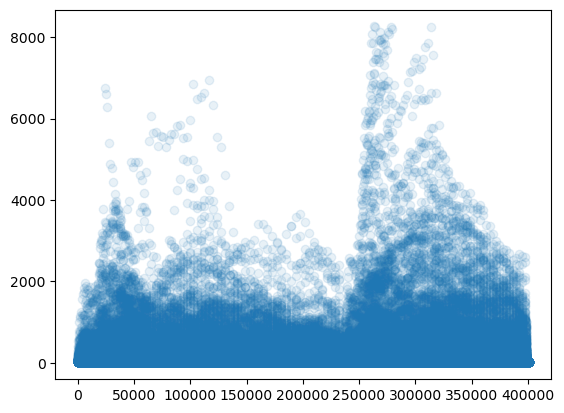

In [8]:
plt.scatter(x = babynames.index, y = babynames.Count, alpha = 0.1)
plt.show()

3. If there are no missing values in the dataset, are we free from the perils of missing data? (hint: given the background link above, is this data completely raw? if not, how could missingness still affect us?)

#### Exploring the Data for Patterns

Having seen this dataset over and over again, and having to answer such a comprehensive set of questions about the data, you all probably have a solid intuition about the dataset and probably have some ideas of trends/patterns you may want to uncover. Discuss amongst yourselves what's something interesting to look for, and pursue it (try to formulate a question where you would have to use regular expressions; questions about certain letter patterns/pairings are good places to start)! Challenge yourselves to produce a plot at the end showing the result of your exploration.

If you don't have any ideas, feel free to start here:

+ As a proportion of individuals named in each year, how many babies have a double-vowel pattern appear at the end or start of their name, compared to somewhere in the middle (think: Aaron and Stephanie vs. Leah). For each year, you should have two proportions, one for the proportion of names with the pattern at either end and one for the proportion with the pattern in the middle.


+ For each year, how many male and female names have a triple vowel pattern somewhere in their name (L**eia**; ignore the first letter for simplicity)? Express each quantity as a proportion of total male or female names for each year, so that you have two proportions for each year. Plot each proportion with the x-axis as the year, and see if such name patterns are becoming more or less common when split by sex.


+ For each year, how many babies in CA had a name with a triple-consonant pattern somewhere in the middle of their name (e.g. Matthew, pattern does not include first and last letters)? Be sure to account for the frequency of the particular names for each year.


+ Consonant-Vowel or Vowel-Consonant? For each year, find the proportion of babies that had a name ending with a vowel followed by a consonant (Esth**er**) and the proportion of babies that had a name ending with a consonant followed by a vowel (Veroni**ca**). Plot the two proportions by year and compare differences and trends.

*Feel free to make as many new cells as you want; it's your EDA!*

*Also, feel free to Google for any coding tips. This link should give you an idea of how regular expressions can be used in Pandas to query data by string patterns (https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/)*. The `str.contains()` method may also be useful.

*Also, you can assume certain niceties about the Name column, like that all names begin with a capital letter and the remaining letter are lowercase, and there are no non-alphabetical characters in the names (note that, according to the background information link, names with hyphens are collapsed into single words)*

#### Post-EDA Critique

1. What did you find in your analysis?


2. Datasets are always representations of some population of interest. Let's suppose our population of interest is all individuals living in the state of California from 1910 to 2021. Would you be comfortable extending your findings to this population? Why or why not? (hint: consider our previous discussion about *scope*)

<br><br>

---

# Question 3: Regex

## Question 3
Which strings contain a match for the following regular expression, "1+1$"? 

* "What is 1+1"
* "Make a wish at 11:11"
* "111 Ways to Succeed"

In [31]:
#Here are the above strings in a Series object.
strings_3 = pd.Series(["What is 1 + 1","Make a wish at 11:11", "111 Ways to succeed"])
pattern_3 = r'1+1$'

##Your code here##
strings_3.str.findall(pattern_3)

0      []
1    [11]
2      []
dtype: object

**Solution:**

B, "Make a wish at 11:11"

## Question 4

Write a regular expression that matches a string which contains only one word containing only
lowercase letters and numbers. (including the empty string)

In [32]:
# Here are some example strings to test on, feel free to add more examples
strings_4 = pd.Series(["match0pls","do not match 1", "don'tmatch2", "DONTMATCH3"])

# Your pattern
pattern_4 = r'^[a-z0-9]*$'

strings_4.str.findall(pattern_4)

0    [match0pls]
1             []
2             []
3             []
dtype: object

## Question 5

Given sometext = "I’ve got 10 eggs, 20 gooses, and 30 giants.", use re.findall to extract all the items and quantities from the string. The result should look like [’10 eggs’, ’20 gooses’, ’30 giants’]. You may assume that a space separates quantity and type, and that each item ends in `s`

In [33]:
sometext = "I've got 10 eggs, 20 gooses, and 30 giants."

# Your pattern
pattern_5 = r"\d\d\s\w+s"
re.findall(pattern_5, sometext)

['10 eggs', '20 gooses', '30 giants']

## Question 6

For each pattern specify the starting and ending position of the first match in the string. The index starts at zero and we are using closed intervals (both endpoints are included).

<img src = "regex_table_disc3.png"></img>

In [37]:
strings_6 = pd.Series(["abcdefg","abcs!","ab abc","abc, 123"])
patterns = [r'abc*', r'[^\s]+',r'ab.*c',r'[a-z1,9]+']

strings_6.str.findall(r"abc*")

0        [abc]
1        [abc]
2    [ab, abc]
3        [abc]
dtype: object

In [38]:
strings_6.str.findall(r"[^\s]+")

0      [abcdefg]
1        [abcs!]
2      [ab, abc]
3    [abc,, 123]
dtype: object

In [39]:
strings_6.str.findall(r"ab.*c")

0       [abc]
1       [abc]
2    [ab abc]
3       [abc]
dtype: object

In [40]:
strings_6.str.findall(r"[a-z1,9]+")

0    [abcdefg]
1       [abcs]
2    [ab, abc]
3    [abc,, 1]
dtype: object

## Question 7 (bonus)

Given the text in the variable `log`, fill in the regular expression in the variable pattern below so that after it executes, day is 26, month is Jan, and year is 2014.



In [43]:
log = '169.237.46.168 - - [26/Jan/2014:10:47:58 -0800] "GET /stat141/Winter04/ HTTP/1.1" 200 2585 "http://anson.ucdavis.edu/courses/"'

# Your pattern 
pattern_5 = r"\[(.+)\/(.+)\/([^:]+).*\]"
#Alternative solution
pattern_5 = r"\[(.+)/(.+)/([^:]+).*\]"

matches = re.findall(pattern_5, log)
day, month, year = matches[0]
print(day,month,year)

26 Jan 2014


## Question 8 (bonus)

Given that sometext is a string, use re.sub to replace all clusters of non-vowel characters with a single period. For example "a big moon, between us..." would be changed to "a.i.oo.e.ee.u."

In [44]:
sometext = "a big moon, between us..."

##Your pattern 
pattern_6 = r"[^aeoiuAEIOU]+"

re.sub(pattern_6,"." , sometext)

'a.i.oo.e.ee.u.'

## Question 9 (bonus)

Given records,

"\<record\> Josh Hug \<hug@cs.berkeley.edu\> Faculty \</record\>"
    
"\<record\> Lisa Yan \<lisa.yan@berkeley.edu\> Instructor \</record\>"

In [ ]:
records = ["<record> Josh Hug <hug@cs.berkeley.edu> Faculty </record>","<record> Lisa Yan <lisa.yan@berkeley.edu> Instructor </record>"]

Which of the following matches exactly to the email addresses (including angle brackets)?

* '<.*@.*>'
* '<[^>]*@[^>]*>'
* '<.*@\w+\..*>'

**Solution:**

Greediness matches too much in the first and third choices. Greediness here
means that the ".\*" matches everything and doesn’t stop matching. For example in
choice A, the closing ">" is not matched with the ">" in "<record>...", instead the
wildcard ".\*" consumes it